In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Set your username and token here!
username = 'hwagner'
token = '25cd874b270fac28'

# Set the datastream and start/enddates
datastream = 'kcgarsclkazrbnd1kolliasM1.c0'
startdate = '2024-09-15'
enddate = '2024-09-20'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240918.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240920.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240916.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240917.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240915.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240919.000000.nc

If you use these data to prepare a publication, please cite:

Johnson, K., Giangrande, S., & Toto, T. Active Remote Sensing of CLouds (ARSCL)
product using Ka-band ARM Zenith Radars (ARSCLKAZRBND1KOLLIAS), 2024-09-15 to
2024-09-20, ARM Mobile Facility (KCG), kennaook ⁄ Cape Grim, Tasmania,
Australia; AMF2 (main site for CAPE-k) (M1). Atmospheric Radiation Measurement
(ARM) User Facility. https://doi.org/10.5439/1393438



In [4]:
# Let's read in the data using ACT and check out the data
ds_kazr = act.io.read_arm_netcdf(result).compute()

ds_kazr

<xarray.Dataset> Size: 16MB
Dimensions:                       (time: 129600, layer: 10)
Coordinates:
  * time                          (time) datetime64[ns] 1MB 2024-09-15 ... 20...
  * layer                         (layer) int32 40B 0 1 2 3 4 5 6 7 8 9
Data variables:
    base_time                     (time) datetime64[ns] 1MB 2024-09-15 ... 20...
    time_offset                   (time) datetime64[ns] 1MB 2024-09-15 ... 20...
    radar_first_top               (time) float32 518kB 1.24e+03 ... 220.0
    cloud_base_best_estimate      (time) float32 518kB 1.22e+03 ... 970.0
    cloud_layer_base_height       (time, layer) float32 5MB -1.0 -1.0 ... -1.0
    cloud_layer_top_height        (time, layer) float32 5MB -1.0 -1.0 ... -1.0
    instrument_availability_flag  (time) int16 259kB 31 31 31 31 ... 31 31 31 31
    lat                           (time) float32 518kB -40.68 -40.68 ... -40.68
    lon                           (time) float32 518kB 144.7 144.7 ... 144.7
    alt                           (time) float32 518kB 80.0 80.0 ... 80.0 80.0
Attributes: (12/22)
    command_line:                     idl -R -n kazrcfrarscl -s kcg -f M1 -b ...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-15.el7
    dod_version:                      arsclkazrbnd1kollias-c0-1.0
    site_id:                          kcg
    platform_id:                      arsclkazrbnd1kollias
    ...                               ...
    doi:                              10.5439/1393438
    history:                          created by user malynn on machine node2...
    _file_dates:                      ['20240915', '20240916', '20240917', '2...
    _file_times:                      ['000000', '000000', '000000', '000000'...
    _datastream:                      kcgarsclkazrbnd1kolliasM1.c0
    _arm_standards_flag:              1

<Axes: title={'center': 'kazr cloud_layer_top_height on 20240915'}, xlabel='Time [UTC]', ylabel='(unitless)'>

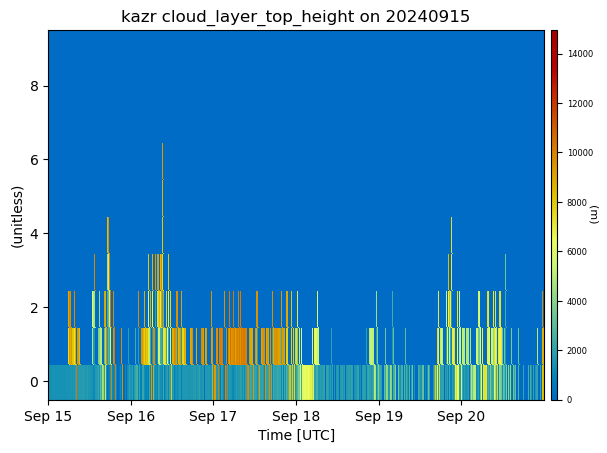

In [5]:
display = act.plotting.TimeSeriesDisplay({'kazr': ds_kazr})

display.plot('cloud_layer_top_height', subplot_index = (0,), cmap = 'HomeyerRainbow')

In [12]:
ds_kazr_subset = ds_kazr.where(((ds_kazr.cloud_layer_top_height < 4_000) & (ds_kazr.cloud_layer_top_height > 5)), drop=True)
ds_kazr_subset

<xarray.Dataset> Size: 24MB
Dimensions:                       (time: 98146, layer: 5)
Coordinates:
  * time                          (time) datetime64[ns] 785kB 2024-09-15T00:0...
  * layer                         (layer) int32 20B 0 1 2 3 4
Data variables:
    base_time                     (time, layer) datetime64[ns] 4MB 2024-09-15...
    time_offset                   (time, layer) datetime64[ns] 4MB 2024-09-15...
    radar_first_top               (time, layer) float32 2MB 190.0 nan ... nan
    cloud_base_best_estimate      (time, layer) float32 2MB 1.22e+03 nan ... nan
    cloud_layer_base_height       (time, layer) float32 2MB 1.18e+03 nan ... nan
    cloud_layer_top_height        (time, layer) float32 2MB 1.24e+03 nan ... nan
    instrument_availability_flag  (time, layer) float32 2MB 31.0 nan ... nan nan
    lat                           (time, layer) float32 2MB -40.68 nan ... nan
    lon                           (time, layer) float32 2MB 144.7 nan ... nan
    alt                           (time, layer) float32 2MB 80.0 nan ... nan nan
Attributes: (12/22)
    command_line:                     idl -R -n kazrcfrarscl -s kcg -f M1 -b ...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-15.el7
    dod_version:                      arsclkazrbnd1kollias-c0-1.0
    site_id:                          kcg
    platform_id:                      arsclkazrbnd1kollias
    ...                               ...
    doi:                              10.5439/1393438
    history:                          created by user malynn on machine node2...
    _file_dates:                      ['20240915', '20240916', '20240917', '2...
    _file_times:                      ['000000', '000000', '000000', '000000'...
    _datastream:                      kcgarsclkazrbnd1kolliasM1.c0
    _arm_standards_flag:              1

In [13]:
ds_kazr_subset["cloud_layer_top_height"]=ds_kazr_subset.cloud_layer_top_height.max("layer")
ds_kazr_subset

<xarray.Dataset> Size: 23MB
Dimensions:                       (time: 98146, layer: 5)
Coordinates:
  * time                          (time) datetime64[ns] 785kB 2024-09-15T00:0...
  * layer                         (layer) int32 20B 0 1 2 3 4
Data variables:
    base_time                     (time, layer) datetime64[ns] 4MB 2024-09-15...
    time_offset                   (time, layer) datetime64[ns] 4MB 2024-09-15...
    radar_first_top               (time, layer) float32 2MB 190.0 nan ... nan
    cloud_base_best_estimate      (time, layer) float32 2MB 1.22e+03 nan ... nan
    cloud_layer_base_height       (time, layer) float32 2MB 1.18e+03 nan ... nan
    cloud_layer_top_height        (time) float32 393kB 1.24e+03 ... 1e+03
    instrument_availability_flag  (time, layer) float32 2MB 31.0 nan ... nan nan
    lat                           (time, layer) float32 2MB -40.68 nan ... nan
    lon                           (time, layer) float32 2MB 144.7 nan ... nan
    alt                           (time, layer) float32 2MB 80.0 nan ... nan nan
Attributes: (12/22)
    command_line:                     idl -R -n kazrcfrarscl -s kcg -f M1 -b ...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-15.el7
    dod_version:                      arsclkazrbnd1kollias-c0-1.0
    site_id:                          kcg
    platform_id:                      arsclkazrbnd1kollias
    ...                               ...
    doi:                              10.5439/1393438
    history:                          created by user malynn on machine node2...
    _file_dates:                      ['20240915', '20240916', '20240917', '2...
    _file_times:                      ['000000', '000000', '000000', '000000'...
    _datastream:                      kcgarsclkazrbnd1kolliasM1.c0
    _arm_standards_flag:              1

<Axes: title={'center': 'kazr cloud_layer_top_height on 20240915'}, xlabel='Time [UTC]', ylabel='cloud_layer_top_height'>

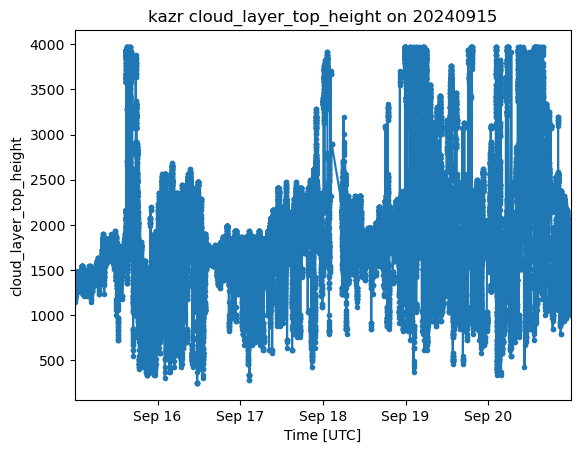

In [14]:
display = act.plotting.TimeSeriesDisplay({'kazr': ds_kazr_subset})

display.plot('cloud_layer_top_height', subplot_index = (0,), cmap = 'HomeyerRainbow')

In [32]:
#Data from the 16th and 12 hours into the 17th for closed MCC clouds

startdate = '2024-09-16'
enddate = '2024-09-18'

datastream = 'kcgarsclkazrbnd1kolliasM1.c0'
ds_closed = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_closed

[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240918.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240916.000000.nc
[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240917.000000.nc

If you use these data to prepare a publication, please cite:

Johnson, K., Giangrande, S., & Toto, T. Active Remote Sensing of CLouds (ARSCL)
product using Ka-band ARM Zenith Radars (ARSCLKAZRBND1KOLLIAS), 2024-09-16 to
2024-09-18, ARM Mobile Facility (KCG), kennaook ⁄ Cape Grim, Tasmania,
Australia; AMF2 (main site for CAPE-k) (M1). Atmospheric Radiation Measurement
(ARM) User Facility. https://doi.org/10.5439/1393438



['/home/jovyan/notebooks/kazr/kcgarsclkazrbnd1kolliasM1.c0/kcgarsclkazrbnd1kolliasM1.c0.20240918.000000.nc',
 '/home/jovyan/notebooks/kazr/kcgarsclkazrbnd1kolliasM1.c0/kcgarsclkazrbnd1kolliasM1.c0.20240916.000000.nc',
 '/home/jovyan/notebooks/kazr/kcgarsclkazrbnd1kolliasM1.c0/kcgarsclkazrbnd1kolliasM1.c0.20240917.000000.nc']

In [33]:
ds_closed = act.io.read_arm_netcdf(ds_closed).compute()
ds_closed = ds_closed.sel(time=slice("2024-09-16T00:00", "2024-09-17T15:00"))

ds_closed

<xarray.Dataset> Size: 4MB
Dimensions:                       (time: 35115, layer: 10)
Coordinates:
  * time                          (time) datetime64[ns] 281kB 2024-09-16 ... ...
  * layer                         (layer) int32 40B 0 1 2 3 4 5 6 7 8 9
Data variables:
    base_time                     (time) datetime64[ns] 281kB 2024-09-16 ... ...
    time_offset                   (time) datetime64[ns] 281kB 2024-09-16 ... ...
    radar_first_top               (time) float32 140kB 220.0 220.0 ... 190.0
    cloud_base_best_estimate      (time) float32 140kB 1e+03 1e+03 ... 1.83e+03
    cloud_layer_base_height       (time, layer) float32 1MB -1.0 -1.0 ... -1.0
    cloud_layer_top_height        (time, layer) float32 1MB -1.0 -1.0 ... -1.0
    instrument_availability_flag  (time) int16 70kB 31 31 31 31 ... 31 31 31 31
    lat                           (time) float32 140kB -40.68 -40.68 ... -40.68
    lon                           (time) float32 140kB 144.7 144.7 ... 144.7
    alt                           (time) float32 140kB 80.0 80.0 ... 80.0 80.0
Attributes: (12/22)
    command_line:                     idl -R -n kazrcfrarscl -s kcg -f M1 -b ...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-15.el7
    dod_version:                      arsclkazrbnd1kollias-c0-1.0
    site_id:                          kcg
    platform_id:                      arsclkazrbnd1kollias
    ...                               ...
    doi:                              10.5439/1393438
    history:                          created by user malynn on machine node2...
    _file_dates:                      ['20240916', '20240917', '20240918']
    _file_times:                      ['000000', '000000', '000000']
    _datastream:                      kcgarsclkazrbnd1kolliasM1.c0
    _arm_standards_flag:              1

In [34]:
ds_closed_subset = ds_closed.where(((ds_closed.cloud_layer_top_height < 4_000) & (ds_closed.cloud_layer_top_height > 5)), drop=True)

ds_closed_subset["cloud_layer_top_height"]=ds_closed_subset.cloud_layer_top_height.max("layer")

ds_closed_subset = ds_closed_subset.resample(time='1min').nearest()

ds_closed_subset

<xarray.Dataset> Size: 440kB
Dimensions:                       (time: 2341, layer: 4)
Coordinates:
  * time                          (time) datetime64[ns] 19kB 2024-09-16 ... 2...
  * layer                         (layer) int32 16B 0 1 2 3
Data variables:
    base_time                     (time, layer) datetime64[ns] 75kB 2024-09-1...
    time_offset                   (time, layer) datetime64[ns] 75kB 2024-09-1...
    radar_first_top               (time, layer) float32 37kB 220.0 nan ... nan
    cloud_base_best_estimate      (time, layer) float32 37kB 1e+03 nan ... nan
    cloud_layer_base_height       (time, layer) float32 37kB 940.0 nan ... nan
    cloud_layer_top_height        (time) float32 9kB 1.15e+03 ... 1.84e+03
    instrument_availability_flag  (time, layer) float32 37kB 31.0 nan ... nan
    lat                           (time, layer) float32 37kB -40.68 nan ... nan
    lon                           (time, layer) float32 37kB 144.7 nan ... nan
    alt                           (time, layer) float32 37kB 80.0 nan ... nan
Attributes: (12/22)
    command_line:                     idl -R -n kazrcfrarscl -s kcg -f M1 -b ...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-15.el7
    dod_version:                      arsclkazrbnd1kollias-c0-1.0
    site_id:                          kcg
    platform_id:                      arsclkazrbnd1kollias
    ...                               ...
    doi:                              10.5439/1393438
    history:                          created by user malynn on machine node2...
    _file_dates:                      ['20240916', '20240917', '20240918']
    _file_times:                      ['000000', '000000', '000000']
    _datastream:                      kcgarsclkazrbnd1kolliasM1.c0
    _arm_standards_flag:              1

<Axes: title={'center': 'Closed MCC cloud_layer_top_height on 20240916'}, xlabel='Time [UTC]', ylabel='cloud_layer_top_height'>

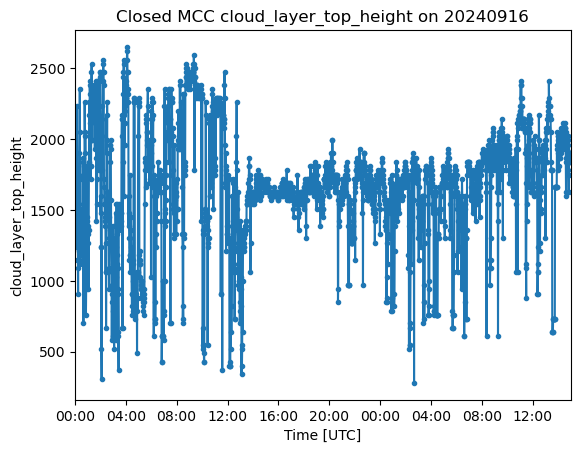

In [36]:
display_closed = act.plotting.TimeSeriesDisplay({'Closed MCC': ds_closed_subset})

display_closed.plot('cloud_layer_top_height', subplot_index = (0,), cmap = 'HomeyerRainbow')

[DOWNLOADING] kcgarsclkazrbnd1kolliasM1.c0.20240919.000000.nc

If you use these data to prepare a publication, please cite:

Johnson, K., Giangrande, S., & Toto, T. Active Remote Sensing of CLouds (ARSCL)
product using Ka-band ARM Zenith Radars (ARSCLKAZRBND1KOLLIAS), 2024-09-19 to
2024-09-19, ARM Mobile Facility (KCG), kennaook ⁄ Cape Grim, Tasmania,
Australia; AMF2 (main site for CAPE-k) (M1). Atmospheric Radiation Measurement
(ARM) User Facility. https://doi.org/10.5439/1393438



<Axes: title={'center': 'Open MCC cloud_layer_top_height on 20240919'}, xlabel='Time [UTC]', ylabel='cloud_layer_top_height'>

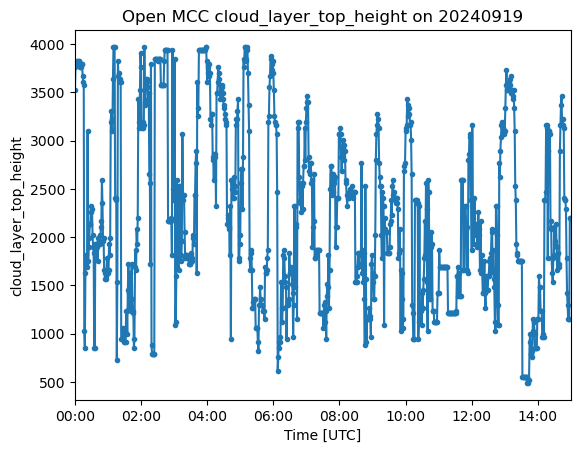

In [28]:
#Data from the 19th for open MCC clouds

startdate = '2024-09-19'
enddate = '2024-09-19'

datastream = 'kcgarsclkazrbnd1kolliasM1.c0'
ds_open = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

ds_open = act.io.read_arm_netcdf(ds_open).compute()
ds_open = ds_open.sel(time=slice("2024-09-19T00:00", "2024-09-19T15:00"))

ds_open_subset = ds_open.where(((ds_open.cloud_layer_top_height < 4_000) & (ds_open.cloud_layer_top_height > 5)), drop=True)
ds_open_subset["cloud_layer_top_height"]=ds_open_subset.cloud_layer_top_height.max("layer")
ds_open_subset = ds_open_subset.resample(time='1min').nearest()
ds_open_subset

display_open = act.plotting.TimeSeriesDisplay({'Open MCC': ds_open_subset})
display_open.plot('cloud_layer_top_height', subplot_index = (0,), cmap = 'HomeyerRainbow')

In [37]:
df_closed = ds_closed_subset.cloud_layer_top_height.to_dataframe()
df_closed

,cloud_layer_top_height
time,
2024-09-16 00:00:00,1150.0
2024-09-16 00:01:00,1300.0
2024-09-16 00:02:00,1360.0
2024-09-16 00:03:00,1330.0
2024-09-16 00:04:00,1360.0
...,...
2024-09-17 14:56:00,1900.0
2024-09-17 14:57:00,1900.0
2024-09-17 14:58:00,1840.0


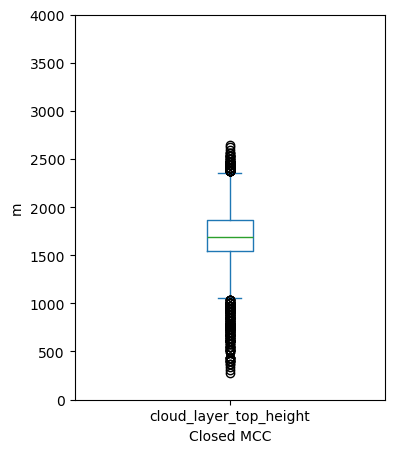

In [46]:
df_closed[['cloud_layer_top_height']].plot.box(
    xlabel = 'Closed MCC',
    ylabel = 'm',
    figsize = (4,5),
    ylim = (0,4000),
);

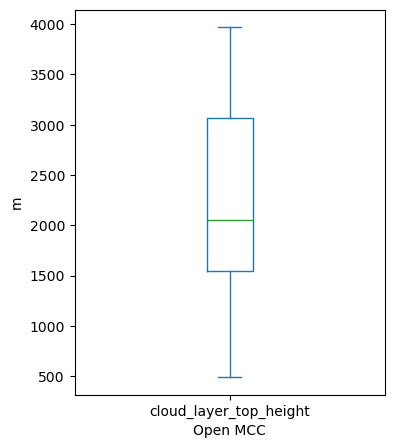

In [43]:
df_open = ds_open_subset.cloud_layer_top_height.to_dataframe()
df_open

df_open[['cloud_layer_top_height']].plot.box(
    xlabel = 'Open MCC',
    ylabel = 'm',
    figsize = (4,5),
);